In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# visualization library
import seaborn as sns

In [3]:
df = pd.read_csv("day.csv")
df=df.drop(['casual', 'registered'], axis=1)
#convert date to numerical value
df['dteday'] = pd.to_datetime(df['dteday'],format="%Y/%m/%d").dt.date
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
#Standardize data before clustering kmean
df["instantS"]=0.0
df["cntS"]=0.0


for i,row in df.iterrows():
        df.at[i,'instantS'] = float(row.instant/df.instant.max())
        df.at[i,'cntS'] = float(row.cnt/df.cnt.max())
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,instantS,cntS
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0.001368,0.113036
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0.002736,0.091921
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0.004104,0.154808
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0.005472,0.179252
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0.006840,0.183613


# KMeans clustering

<IPython.core.display.Javascript object>


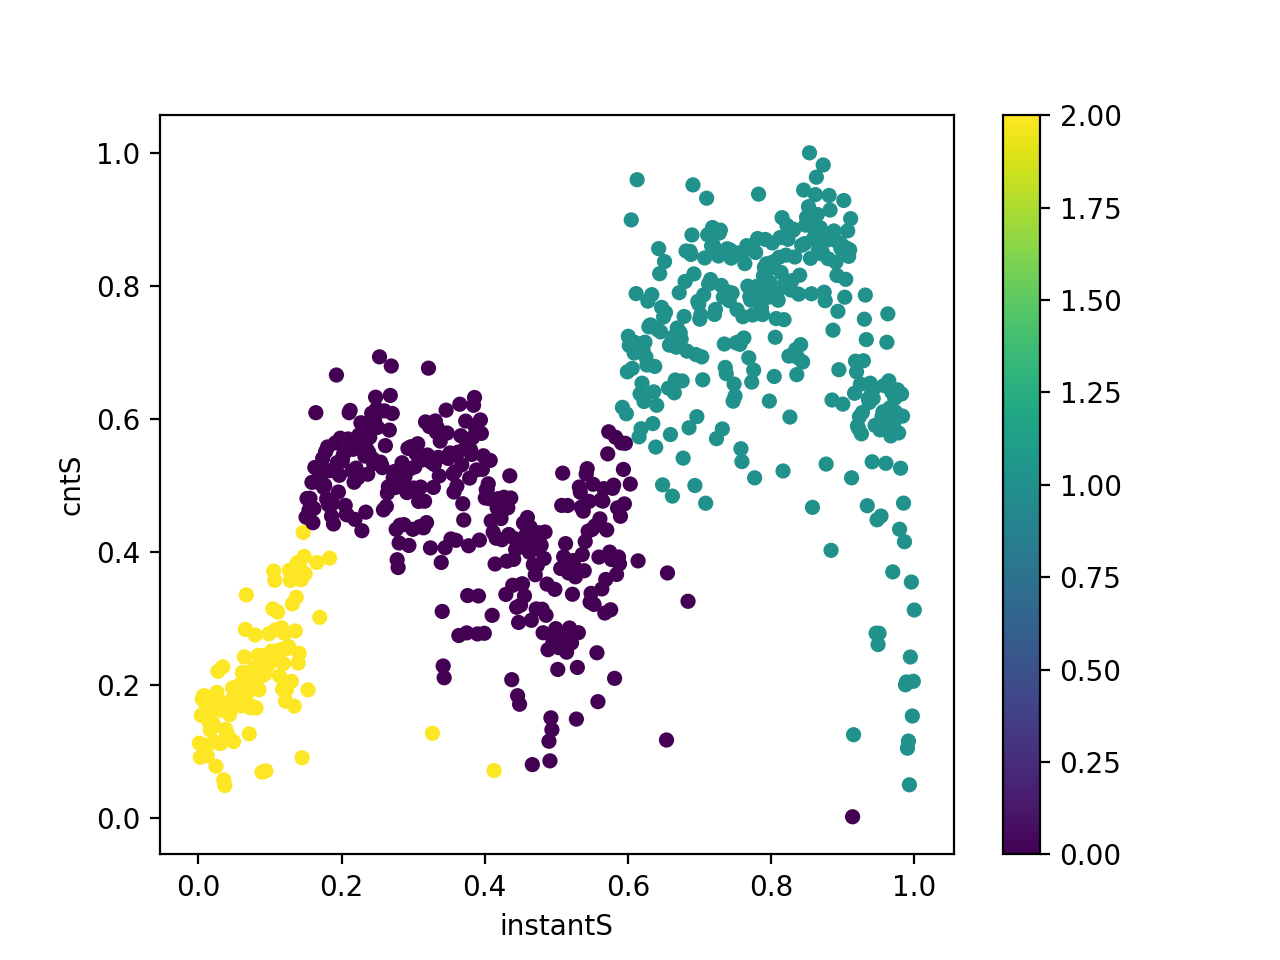

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df[['instantS', 'cntS']])
df.plot.scatter('instantS', 'cntS', c=kmeans.labels_, colormap='viridis')

<IPython.core.display.Javascript object>


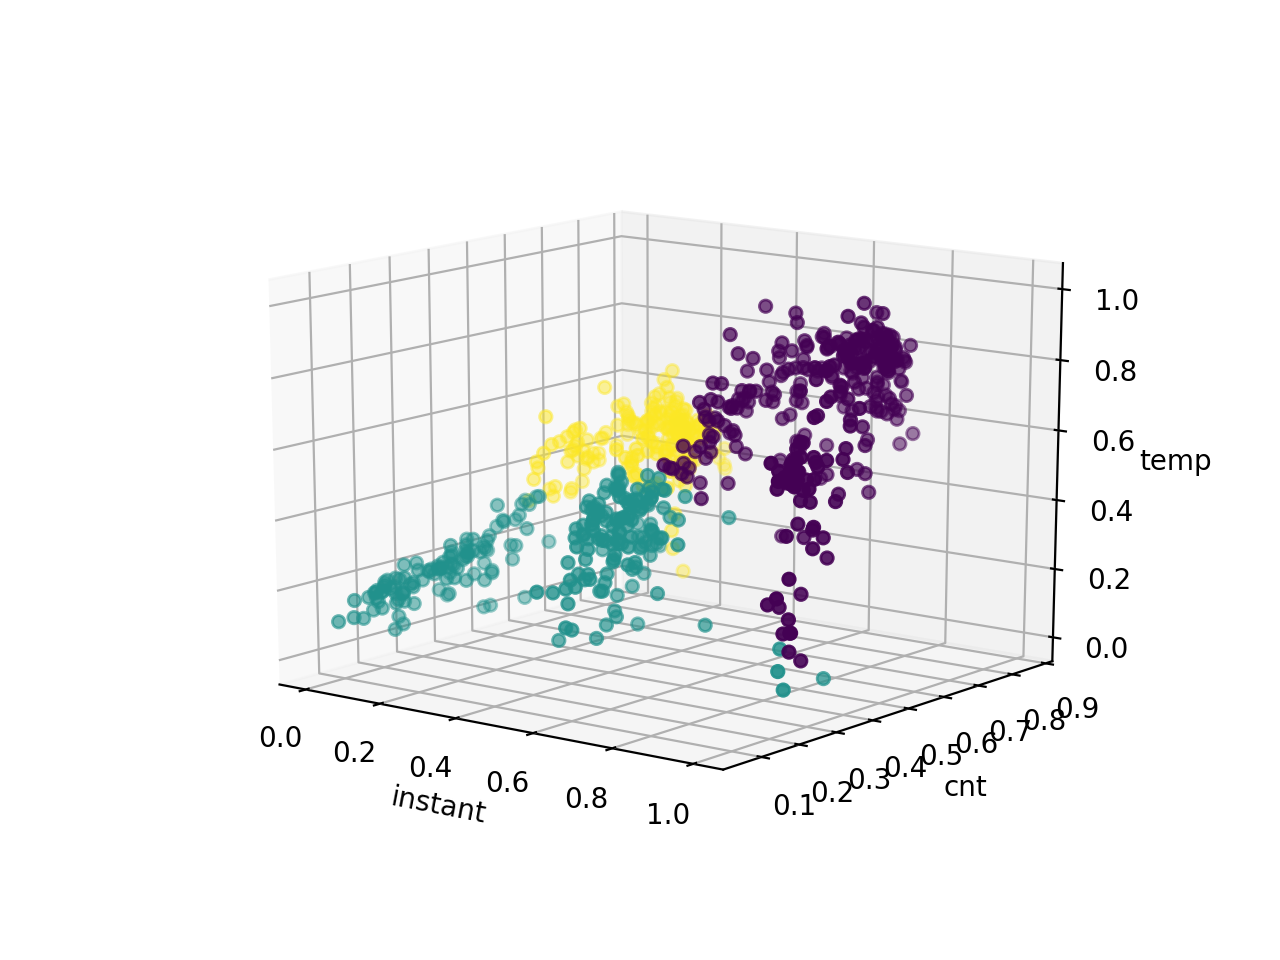

In [6]:
%matplotlib notebook
### K-means 3 features ###
kmeans = KMeans(n_clusters=3).fit(df[['instantS', 'temp', 'cntS']])

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['instantS'], df['temp'], df['cntS'], c=kmeans.labels_)
threedee.set_xlabel('instant')
threedee.set_ylabel('cnt')
threedee.set_zlabel('temp')
plt.show()

### Hierarchical Agglomerative Clustering

In [7]:
%matplotlib inline


# Computing the matrix of distances
from sklearn.metrics.pairwise import euclidean_distances
Q = df[['instantS', 'cntS']]
D = euclidean_distances(Q.values.reshape(-1, 2))

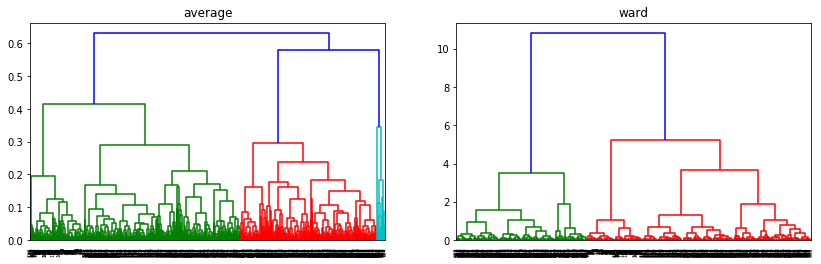

In [8]:
# Average linkage
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
clusta = linkage(Q, 'average')
dbd1 = dendrogram(clusta)
plt.title('average')

plt.subplot(1, 2, 2)
clustw = linkage(Q, 'ward')
dbd2 = dendrogram(clustw)
plt.title('ward')

plt.show()

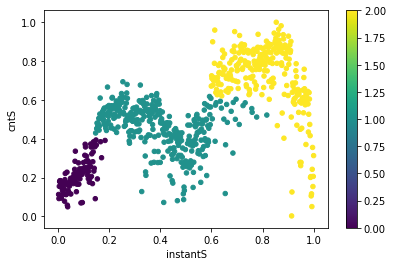

In [9]:
# extracting the clusters
from scipy.cluster.hierarchy import fcluster, cut_tree
clusterw = cut_tree(clustw, 3)

plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 2, 2)
df.plot.scatter('instantS', 'cntS', c=clusterw.reshape(-1), colormap='viridis', ax=ax)
plt.show()

# Comparation Kmeans-Hierarchical (n=3)

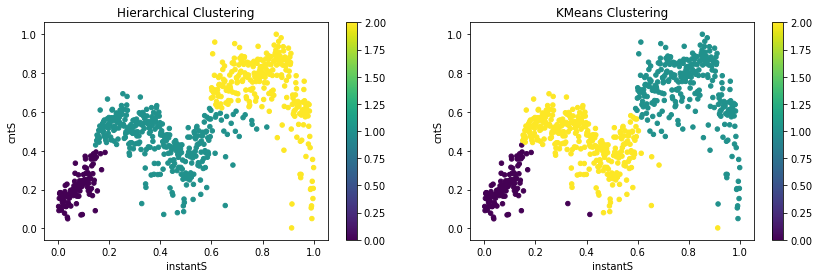

In [10]:
clusterw = cut_tree(clustw, 3)

kmeans = KMeans(n_clusters=3).fit(df[['instantS', 'cntS']])

plt.figure(figsize=(14, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text('Hierarchical Clustering')
df.plot.scatter('instantS', 'cntS', c=clusterw.reshape(-1), colormap='viridis', ax=ax1)


ax2 = plt.subplot(1, 2, 2)
ax2.title.set_text('KMeans Clustering')
df.plot.scatter('instantS', 'cntS', c=kmeans.labels_, colormap='viridis',ax=ax2)
plt.show()

# Clustering evaluation

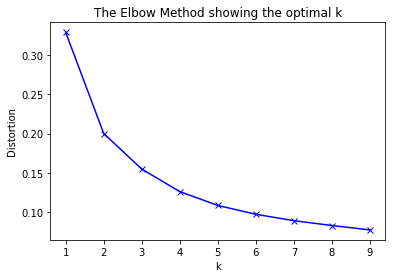

In [11]:
#choosing the number of clusters
from scipy.spatial.distance import cdist

feature_cols = ['instantS','cntS']
X = np.array(df.loc[:, feature_cols])

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

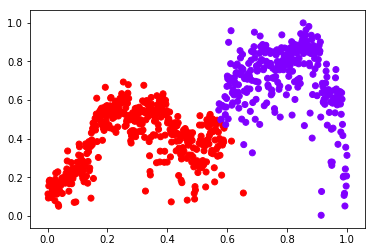

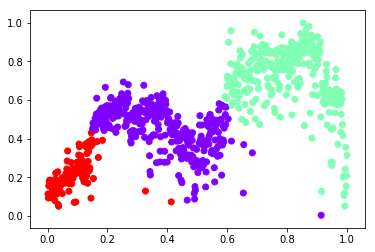

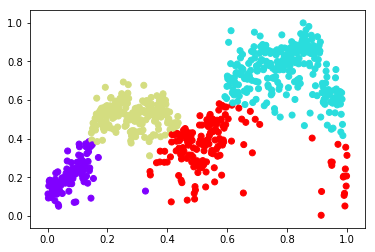

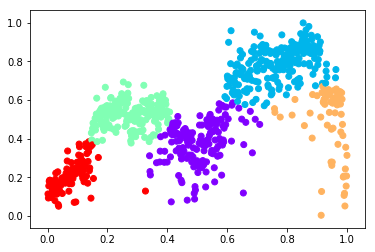

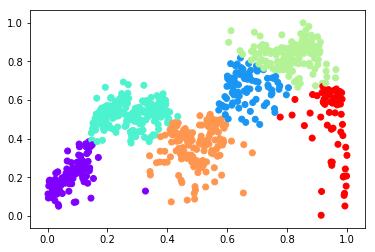

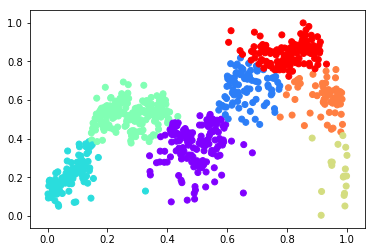

In [19]:
for n in range(2,8):
    kmeans = KMeans(n_clusters=n)  
    kmeans.fit(X)  
    #print(kmeans.inertia_)
    plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
    plt.show()

# Adding cluster label (to use for classification)

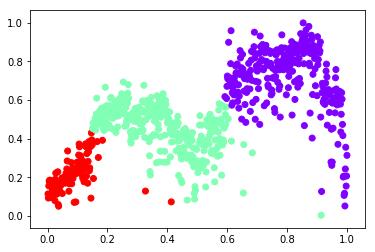

In [62]:
#Adding cluster feature
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.show()


In [65]:
#red=cl1 green=cl2 violet=cl3

df["cluster"]=kmeans.labels_
df['cluster'].replace([2], 'cl1',inplace=True)
df['cluster'].replace([1], 'cl2',inplace=True)
df['cluster'].replace([0], 'cl3',inplace=True)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster
0,1,734138,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,cl1
1,2,734139,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,cl1
2,3,734140,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,cl1
3,4,734141,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,cl1
4,5,734142,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,cl1


In [66]:
#df=df.drop(["instantS","cntS"],axis=1)
df.to_csv('df_Preprocessed1.csv', index=False)

# Adding manually threshold

In [67]:
threshold=4700
for i,row in df.iterrows():
    if row.cnt >= threshold:
        df.at[i,'cluster'] = "high"
    else:
        df.at[i,'cluster'] = "low"
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster
0,1,734138,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,low
1,2,734139,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,low
2,3,734140,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,low
3,4,734141,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,low
4,5,734142,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,low


In [68]:
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster
0,1,734138,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,low
1,2,734139,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,low
2,3,734140,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,low
3,4,734141,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,low
4,5,734142,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,low
5,6,734143,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606,low
6,7,734144,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510,low
7,8,734145,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959,low
8,9,734146,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822,low
9,10,734147,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321,low


In [17]:
df.to_csv('df_Preprocessed2.csv', index=False)